<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: Predicting a numerical variable based on some other combination of variables... predicting a number



In [ ]:
# Import TensorFlow
import tensorflow as tf

print(tf.__version__)

2.8.0


# Create data to view and fit

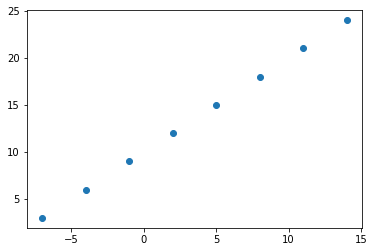

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [ ]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

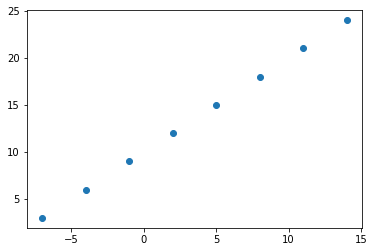

In [ ]:
plt.scatter(X, y)

## steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layrs of a deep learning model.

2. **Compiling a model** - define a loss function (The function which tells our model how wrong it is.) and the optimizer (tells our model how to improve the pattersn it's learning. and evaluation metrics (What we can use to interprit the performance of out model.)

3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 299ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Checkout X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
y_pred = model.predict([17.0])
y_pred + 11

array([[23.71602]], dtype=float32)

# Improving our model

We can improve our model by altering the steps we took to create our model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (allso called neurons) within each of the hidden layers, change the activation functions of each layer

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of said optimization function

3. **Fitting Model** - Here we might fit a model for more **epochs** (Leave it training for longer) or on more data (Give the model more examples to learn from)

In [ ]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model (This time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 313ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our models prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  # tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.1), 
              metrics=["mae"])

# Fit the model (This time we will add a learning rate)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 327ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1236 - mae: 10.1236
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6736 - mae: 9.6736
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 9.2236 - mae: 9.2236
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7736 - mae: 8.7736
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3236 - mae: 8.3236
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8736 - mae: 7.8736
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4236 - mae: 7.4236
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9736 - mae: 6.9736
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8250 - mae: 6.8250
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7706 - m

In [ ]:
# Let's see if our models prediction has improved
model.predict([17.0])

array([[27.497078]], dtype=float32)

In [ ]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.01), 
              metrics=["mae"])

# Fit the model (This time we will add a learning rate)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 363ms/step - loss: 14.2261 - mae: 14.2261
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.5328 - mae: 13.5328
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1611 - mae: 12.1611
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4786 - mae: 11.4786
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7953 - mae: 10.7953
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1084 - mae: 10.1084
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4153 - mae: 9.4153
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9998 - mae: 7.9998
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss:

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our models prediction has improved
model.predict([17.0])

array([[27.13847]], dtype=float32)

# Evaluating a model

In practice, a typical workflow you'll go through when building neural network is: 

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it..
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

it's a good idea to visualize: 
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the predictions of a model line up with the line truth(original labels)? 

In [ ]:
# Make a bigger dataset 
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

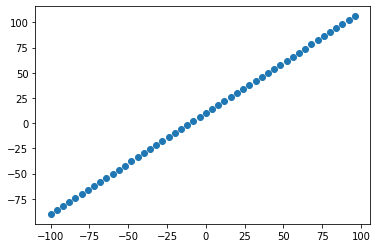

In [ ]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets... 

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **The test set** - the model gets evaluated on this data to test what it has learned. This set is typically 10-15% of the data available


In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test set

X_train = X[:40] # first 40 training samples 80% 
y_train = X[:40]
X_test = X[40:]
y_test = X[40:]
len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data split, let's Visualize it

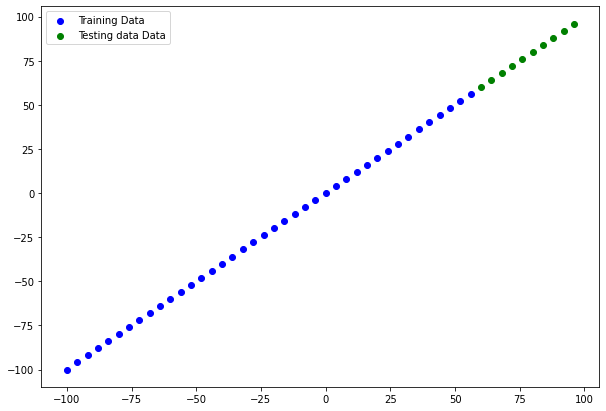

In [ ]:
plt.figure(figsize=(10, 7))

#plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Testing data Data')
# Show a legend
plt.legend();

In [ ]:
# Let's have a look on how to build a neural network for our data

# Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# Comipile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# Fit the model
# model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

### Visualizing the model

In [ ]:
# model.summary()

In [ ]:
# Let's create a model which builds automatically byt defining the input_shape argument in the first layer

tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
                             tf.keras.layers.Dense(1, name='output_layer')
], name='model1')

# Comipile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])





In [ ]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model. (These are the pattersns that the model is going to learn)

* Trainable paramters - these are the parameters (patterns) the model can update as it trains

* Non-trainable params - these paramters arn't updated during training (This is typical when you bring in already learnt pattersn or parameters from other models during **Transfer Learning**

In [ ]:
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


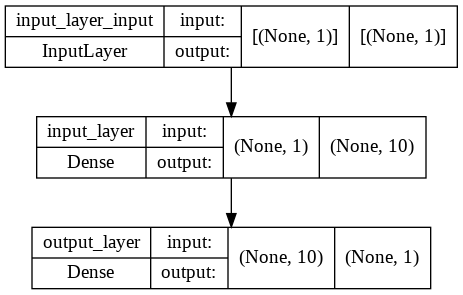

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# Visualzing models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

often you'll see this in the form of `y_test` or `y_true` vs `y_pred`
(ground truth vs models predictions)




In [ ]:
# Make some predictions to create y_pred

y_pred = model.predict(X_test)
y_pred

array([[58.854504],
       [62.776302],
       [66.6981  ],
       [70.619896],
       [74.5417  ],
       [78.4635  ],
       [82.38529 ],
       [86.30709 ],
       [90.22889 ],
       [94.15068 ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots Training data, test data and compares predictions to ground truth labels
  """

  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot models predictions
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  plt.legend()


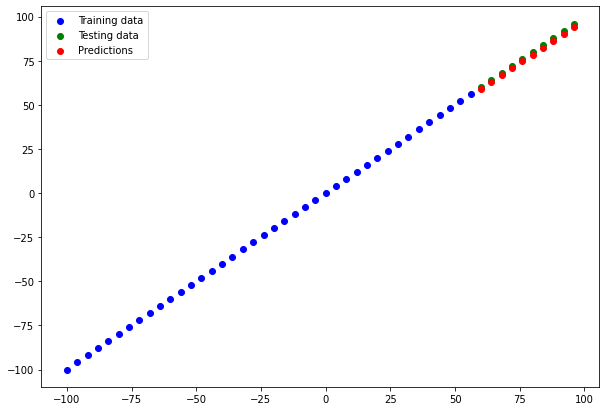

In [ ]:
plot_predictions()

### Evaluating our models predictions. with regression evalutatgion metrics

Depending on the problem you are working on, there will be different evaluation metric to evaluate your model's performance

Since we are working on a regression problem, 2 of the main metrics:
* MAE - Mean absolute error " On average how wrong is each of my models predictions
* MSE - mean squared error - "Square the average errors"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 111ms/step - loss: 1.4974 - mae: 1.4974


[1.4974044561386108, 1.4974044561386108]

In [ ]:
y_pred


array([[58.854504],
       [62.776302],
       [66.6981  ],
       [70.619896],
       [74.5417  ],
       [78.4635  ],
       [82.38529 ],
       [86.30709 ],
       [90.22889 ],
       [94.15068 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

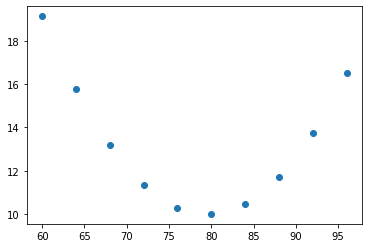

In [ ]:
# Calc the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)


plt.scatter(y_test, mae)

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.4974045>

In [ ]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.2926738>

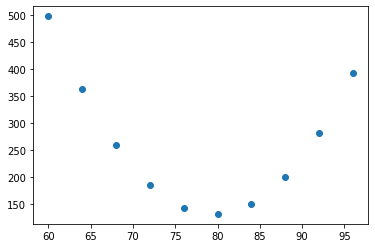

In [ ]:
plt.scatter(y_test, tf.metrics.mean_squared_error(y_test, y_pred))

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

# Running experiments to improve our model
1. Get more data - get more examples for your model to train on (More opportunities to learn patters or relationships between features and labels)
2. Make your model larger - using a more complex model (This might come in the form of more layers or more hidden units in each layer)
3. Train for longer - give your model more of a chance to find patterns of the data

Let's do 3 modeling experiments: 
1. `model 1` - same as the original mode, 1 layer, but train for 100 epochs
2. `model 2` - 2 layers, trained for 100 epochs
3. `model 3` - 2 layers trained for 500 epochs 

In [ ]:
# Model 1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics='mae')

model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.3155 - mae: 15.3155
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7969 - mae: 12.7969
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 14.6829 - mae: 14.6829
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 14.4182 - mae: 14.4182
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.2908 - mae: 15.2908
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 13.1122 - mae: 13.1122
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8898 - mae: 9.8898
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 8.2459 - mae: 8.2459
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 14.4503 - mae: 14.4503
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 17.1168 - mae: 17.1168
Epoch 11/100
2/2 [==============================] - 0s 3ms/step

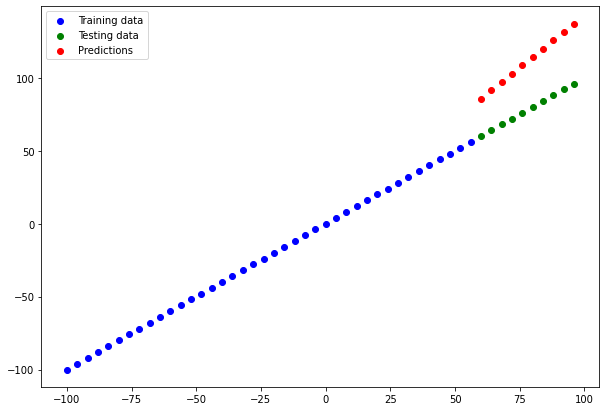

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=33.441246>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1142.5887>)

Model 2

In [ ]:
# Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics='mae')

model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 28.5179 - mae: 28.5179
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 23.5481 - mae: 23.5481
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 30.3879 - mae: 30.3879
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 30.0180 - mae: 30.0180
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3066 - mae: 11.3066
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9600 - mae: 14.9600
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 15.8804 - mae: 15.8804
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 17.7428 - mae: 17.7428
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 46.8813 - mae: 46.8813
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 30.8266 - mae: 30.8266
Epoch 11/100
2/2 [==============================] - 0s 8

(<tf.Tensor: shape=(), dtype=float32, numpy=21.2671>,
 <tf.Tensor: shape=(), dtype=float32, numpy=462.17032>)

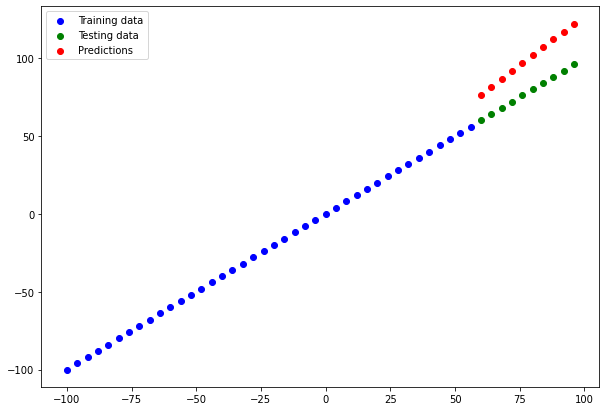

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

Model 3

In [ ]:
# Model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([

                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics='mae')

model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500, verbose=False)

(<tf.Tensor: shape=(), dtype=float32, numpy=2.403375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.9015493>)

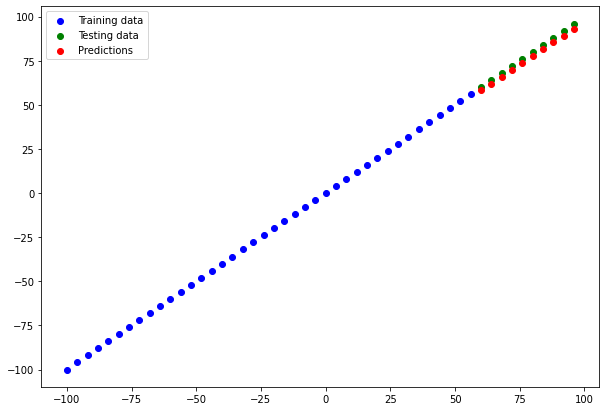

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

**Note:**  You want to start with small experiments(small models) and make sure they work and then increase their scale when necessary.

# Comparing the results of our expirements

Weve run a few experiments now, let's compare the results

In [ ]:
# Let's compare our models results using pandas dataframe
import pandas as pd
model_results = [
                 ['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()],
]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,21.267099,462.170319
1,model_2,21.267099,462.170319
2,model_3,2.403375,5.901549


In [ ]:
model_3.summary()

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


> Looks like `model_3` performed the best

**Note:** One of you main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember ML practiconers model is: "Experiment, Experiment, Experiment"


## Tracking your experiments

One really good habit in machine learning modeling is to track the results of your experiments
And when doing so, it can be tedious if you're running lots of experiments.

There are tools to help us:

**Resources**: As you build more models, you7'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modeling experiments

* Weights & Biases - A tool for tracking all kinds of machine learning experiments (Plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of google colab such as a web application or a mobile app

There are 2 formats we can save our models to:
1. The SavedModel Format
2. The HDF5 format

In [ ]:
# Save a model using the SavedModel Format
model_3.save('model_3_SavedModel_format')

INFO:tensorflow:Assets written to: model_3_SavedModel_format/assets


In [ ]:
# Save a model using the HDF5 Format
model_3.save('model_3_HDF5_format.h5')

## Loading in a saved model



In [ ]:
# Load in the SavedModel Format
loaded_SavedModel_format = tf.keras.models.load_model('/content/model_3_SavedModel_format')
loaded_SavedModel_format.summary()

In [ ]:
# Compare model_3 predictions with savedModel
model_3_preds = model_3.predict(X_test)
model_3_preds

array([[58.151287],
       [62.02803 ],
       [65.90477 ],
       [69.78151 ],
       [73.65826 ],
       [77.534996],
       [81.411736],
       [85.28848 ],
       [89.16522 ],
       [93.04196 ]], dtype=float32)

In [ ]:
# Check if saved model is the same as unsaved model
model_3_saved_pred = loaded_SavedModel_format.predict(X_test)
model_3_saved_pred == model_3_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_test, model_3_preds) == mae(y_test, model_3_saved_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model (Or any other file) from google colab



In [ ]:
# Download a file 
from google.colab import files
files.download('/content/model_3_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One hot encoding for categorical features
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X & y labels 
X = insurance_one_hot.drop(['charges'], axis=1)
y = insurance_one_hot['charges']
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1070, 11), (268, 11))

# Build a neural network


In [ ]:
model_2.summary()

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 10)                20        
                                                                 
 dense_118 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# insurance_model_1
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([

                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics='mae')

insurance_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=False)

In [ ]:
insurance_model.summary()

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 1, 10)             120       
                                                                 
 dense_136 (Dense)           (None, 1, 1)              11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Right now it looks like our model isn't perfoming too well. Let's try to improve it. 

To try and improve our model we will run 2 experiments: 
1. Add an extra layer with more hidden layers and use the Adam optimizer
2.  same as above but train for longer

In [ ]:
# insurance_model_2
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),        
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics='mae')

insurance_model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=False)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.3218 - mae: 3167.3218


[3167.32177734375, 3167.32177734375]

In [ ]:
# insurance_model_3
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),        
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics='mae')

history = insurance_model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500, verbose=False)

# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5703 - mae: 3170.5703


[3170.5703125, 3170.5703125]

Text(0, 0.5, 'loss')

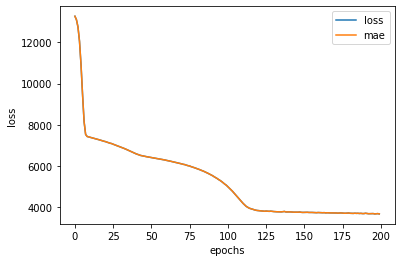

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

> "How long should you train for?"

it depends on the problem you are working on.
TensorFlow has a solution. It's called the earlystopping callback
which is TensorFlow component you can add to your model once it stops improving a certain metric

# Preprocessing data (normilazatin and standardization)


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization and one hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal =  ct.transform(X_test)


array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# What does our data look like?
X_train_normal[19]

array([0.73913043, 0.69518429, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded


In [ ]:
# insurance_model_normal
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics='mae')

history = insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=100, verbose=True)

#Evaluate
insurance_model_4.evaluate(X_test_normal, y_test)



Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

[3438.784423828125, 3438.784423828125]

Text(0, 0.5, 'loss')

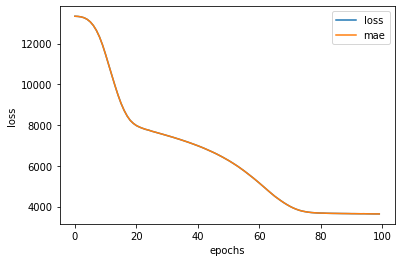

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')